In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import preprocessing
import scipy as sp
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
meteo=df.loc[:,['Temperature','Dew Point','Relative Humidity','Wind Speed','Visibility','WeatherDelay']]
#,'Precipitation','Precipitation Cover'

In [4]:
meteo_Zero=meteo[meteo['WeatherDelay'] == 0]
meteo_Zero.head()

,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay
0,16.6,8.8,70.99,8.1,10.0,0.0
1,16.6,8.8,70.99,8.1,10.0,0.0
2,16.6,8.8,70.99,8.1,10.0,0.0
3,19.1,10.1,67.40,7.7,10.0,0.0
4,19.1,10.1,67.40,7.7,10.0,0.0


In [5]:
meteo_Zero.shape

(1031853, 6)

In [6]:
meteo_Zero=meteo_Zero[0:78285]
meteo_Zero

,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay
0,16.6,8.8,70.99,8.1,10.0,0.0
1,16.6,8.8,70.99,8.1,10.0,0.0
2,16.6,8.8,70.99,8.1,10.0,0.0
3,19.1,10.1,67.40,7.7,10.0,0.0
4,19.1,10.1,67.40,7.7,10.0,0.0
5,19.1,10.1,67.40,7.7,10.0,0.0
6,8.9,4.5,82.19,7.6,10.0,0.0
7,8.9,4.5,82.19,7.6,10.0,0.0
8,6.2,2.5,84.66,4.8,10.0,0.0
9,6.2,2.5,84.66,4.8,10.0,0.0


In [7]:
meteo=meteo[meteo['WeatherDelay'] > 0]
meteo.head()

,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay
28,65.0,55.6,71.63,16.1,10.0,233.0
50,31.4,29.5,92.85,12.8,2.2,22.0
127,23.1,10.1,56.99,8.4,10.0,30.0
150,25.1,16.6,69.76,8.2,10.0,3.0
154,18.4,12.4,77.12,3.3,9.6,25.0


In [8]:
print(df.shape)
print(meteo.shape)

(1110138, 32)
(78285, 6)


In [9]:
meteo=pd.concat([meteo, meteo_Zero], ignore_index = True)
print(meteo.shape)
meteo.head()

(156570, 6)


,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay
0,65.0,55.6,71.63,16.1,10.0,233.0
1,31.4,29.5,92.85,12.8,2.2,22.0
2,23.1,10.1,56.99,8.4,10.0,30.0
3,25.1,16.6,69.76,8.2,10.0,3.0
4,18.4,12.4,77.12,3.3,9.6,25.0


In [10]:
X=meteo.iloc[:,:-1].values
y=meteo.iloc[:,5].values
X

array([[65.  , 55.6 , 71.63, 16.1 , 10.  ],
       [31.4 , 29.5 , 92.85, 12.8 ,  2.2 ],
       [23.1 , 10.1 , 56.99,  8.4 , 10.  ],
       ...,
       [52.  , 38.2 , 59.22,  5.9 , 10.  ],
       [52.  , 38.2 , 59.22,  5.9 , 10.  ],
       [52.  , 38.2 , 59.22,  5.9 , 10.  ]])

In [11]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

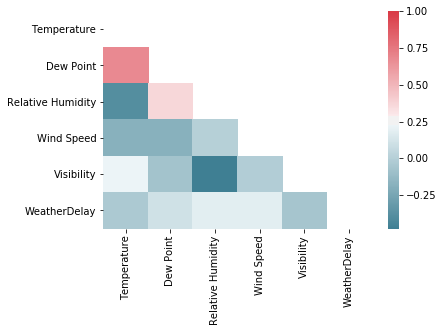

In [12]:
plot_corr(meteo.corr())

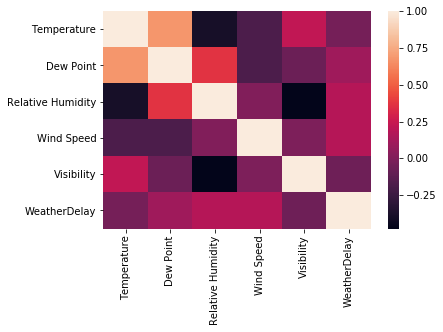

In [13]:
sns.heatmap(meteo.corr())

In [14]:
#La variable Temperature est corrélée à la Dew Point donc nous l'avons supprimée
X=X[:,[0,2,3,4]]
#X

In [15]:
#X = sm.add_constant(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
y_train

array([ 0., 77., 80., ...,  5., 10.,  0.])

In [18]:
#X = sm.add_constant(X)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.237
Model:                            OLS   Adj. R-squared (uncentered):              0.237
Method:                 Least Squares   F-statistic:                              9750.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:03:31   Log-Likelihood:                     -6.5218e+05
No. Observations:              125256   AIC:                                  1.304e+06
Df Residuals:                  125252   BIC:                                  1.304e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0200      0.005      3.953      0.000       0.010       0.030
x2             0.2483      0.004     68.835      0.000       0.241       0.255
x3             1.2209      0.019     64.133      0.000       1.184       1.258
x4            -0.3728      0.032    -11.703      0.000      -0.435      -0.310
==============================================================================
Omnibus:                   139527.561   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21252164.913
Skew:                           5.581   Prob(JB):                         0.00
Kurtosis:                      65.829   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_pred=model.predict()

In [20]:
#mod = sm.RecursiveLS(y,X).fit()
#mod.summary()

In [21]:
r2_score(y_train,y_pred)

0.06540078410875738

In [22]:
mean_squared_error(y_train,y_pred)

1950.0315991037041

In [23]:
mean_absolute_error(y_train,y_pred)

25.06245593525078